## Objective

In this step, you are asked for analysing the whole data already used in the previous checkpoints, by applying the principal component analysis.

## Instructions

    Load your data as usual
    Standardize your data
    Compute the correlation matrix
    plot the covariance matrix to identify the correlation between features 
    Apply the PCA on your data
    Plot the appropriate visualization after reducing the dimension of our data. 

Don’t forget to implement this work with both R and python

In [3]:
# LOADING THE DATA
import pandas as pd

data = pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
# DATA STANDARDIZATION

from sklearn.preprocessing import StandardScaler as SS

features = ['satisfaction_level',  'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company',
            'Work_accident', 'left','promotion_last_5years']
elements = data.loc[:, features].values
standardize = SS().fit_transform(elements)
standardize


array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.41116529,
         1.788917  , -0.14741182],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.41116529,
         1.788917  , -0.14741182],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.41116529,
         1.788917  , -0.14741182],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.41116529,
         1.788917  , -0.14741182],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.41116529,
         1.788917  , -0.14741182],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.41116529,
         1.788917  , -0.14741182]])

In [16]:
# COVARIANCE MATRIX COMPUTATION
import numpy as np

cov_data = np.corrcoef(elements.T)
cov_data

array([[ 1.        ,  0.10502121, -0.14296959, -0.02004811, -0.10086607,
         0.05869724, -0.38837498,  0.02560519],
       [ 0.10502121,  1.        ,  0.34933259,  0.3397418 ,  0.13159072,
        -0.00710429,  0.00656712, -0.00868377],
       [-0.14296959,  0.34933259,  1.        ,  0.41721063,  0.19678589,
        -0.00474055,  0.02378719, -0.00606396],
       [-0.02004811,  0.3397418 ,  0.41721063,  1.        ,  0.12775491,
        -0.01014289,  0.07128718, -0.00354441],
       [-0.10086607,  0.13159072,  0.19678589,  0.12775491,  1.        ,
         0.00212042,  0.14482217,  0.06743293],
       [ 0.05869724, -0.00710429, -0.00474055, -0.01014289,  0.00212042,
         1.        , -0.15462163,  0.03924543],
       [-0.38837498,  0.00656712,  0.02378719,  0.07128718,  0.14482217,
        -0.15462163,  1.        , -0.06178811],
       [ 0.02560519, -0.00868377, -0.00606396, -0.00354441,  0.06743293,
         0.03924543, -0.06178811,  1.        ]])

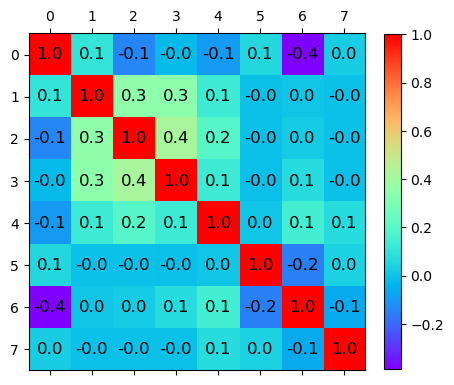

In [31]:
# PLOTTING THE COVARIANCE MATRIX CHAT

import matplotlib.pyplot as mpl

img = mpl.matshow(cov_data, cmap = mpl.cm.rainbow)
mpl.colorbar(img, fraction=0.045)
for x in range(cov_data.shape[0]): #where [0] specifies rows
    for y in range(cov_data.shape[1]): #where [1] specifies columns
        mpl.text(x, y, "%0.1f" % cov_data[x,y], size=12, color='black', ha="center", va="center") # "%0.2f" % cov_data[x,y] specifies cov_data in 2 decimal places
        
mpl.show()


In [43]:
# PCA COMPUTATION

from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #number of features to consider
principal_components = pca.fit_transform(standardize)
principal_df = pd.DataFrame(principal_components, columns = ['PC1', 'PC2'])
final_pc_df = pd.concat([principal_df, data[['salary']]], axis = 1)#double [[]] convert the variety to dataframe as against list
final_pc_df.head(20)


,PC1,PC2,salary
0,-1.304221,-2.440874,low
1,2.416479,-0.378320,medium
2,3.548439,-1.634946,medium
3,1.865397,-0.615025,low
4,-1.302636,-2.476430,low
5,-1.450454,-2.436503,low
6,2.543049,-2.048864,low
7,2.037605,-0.033509,low
8,2.098441,0.041597,low
9,-1.492583,-2.396637,low


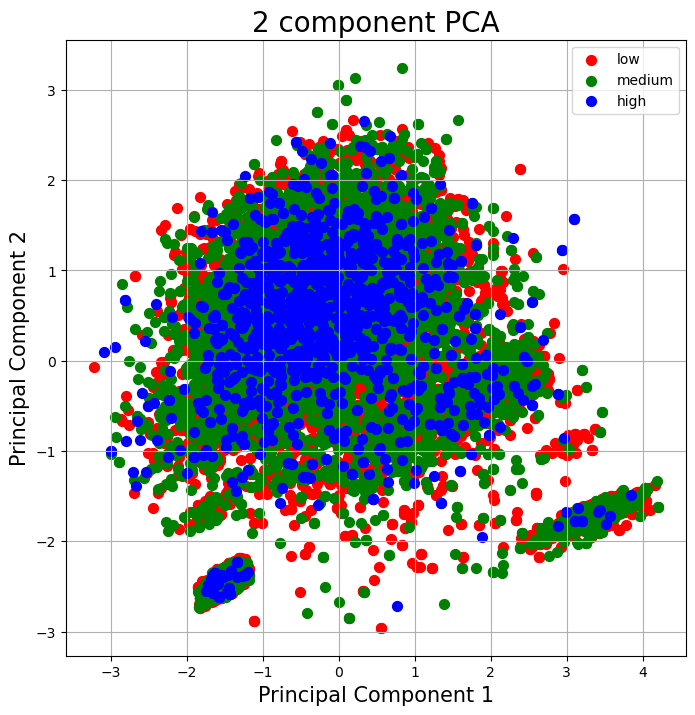

In [44]:
fig = mpl.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['low', 'medium', 'high']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):# nested for loop using zip
    indicesToKeep = final_pc_df['salary'] == target
    ax.scatter(final_pc_df.loc[indicesToKeep, 'PC1']
               , final_pc_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()